In [66]:
%%bash
# pip3 install sklearn pandas matplotlib pyclustering

In [67]:

from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# for medoids
# from sklearn_extra.cluster import KMedoids # no way to install
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from pyclustering.cluster import cluster_visualizer
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import time

%matplotlib inline

In [68]:
k = 4
colors = ['green', 'blue', 'orange', 'red', 'purple', 'yellow', 'cyan', 'black', 'pink', 'sky']


In [69]:
df = pd.read_csv('rawdata1K.dat', delim_whitespace=True)
df.columns = ["X", "Y"]

In [70]:
scaler = MinMaxScaler()
df.X = scaler.fit(df[['X']]).transform(df[['X']])
df.Y = scaler.fit(df[['Y']]).transform(df[['Y']])

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


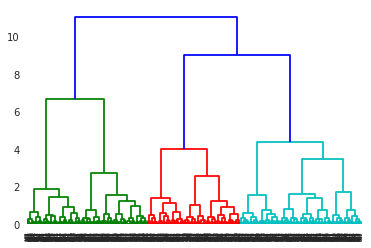

In [71]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

In [72]:
hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')

In [73]:
y_hc = hc.fit_predict(df)

In [74]:
# plt.scatter(points[y_hc==0,0], points[y_hc==0,1], s=100, c='orange')
df['cluster'] = y_hc

dfs = []
for i in range(0,k):
    dfs.append(df[df.cluster==i])

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


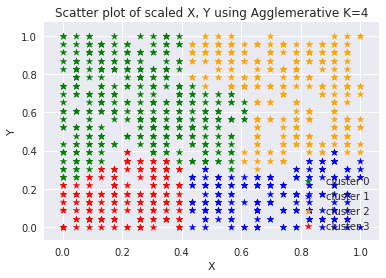

In [75]:

# Plot it
for i in range(0,k):
    plt.scatter(dfs[i].X, dfs[i].Y, color=colors[i], marker='*', label='cluster ' + str(i))
    
plt.title('Scatter plot of scaled X, Y using Agglemerative K='+str(k))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.savefig('images/scatter-plot-agglemerative-k-'+str(k)+'.png', dpi=300, bbox_inches='tight')
plt.show()